#  Попередня обробка зображень - вар 1

Мета - вивчити просторову фільтрацію зображень, методи мінімізації  шуму, морфології, виділення країв і границь та елементи бібліотеки  OpenCV для розв'язання цих завдань 

In [4]:
!pip3 install opencv-python

     ---------------------------------------- 38.2/38.2 MB 2.3 MB/s eta 0:00:00


# 1D лінійна фільтрація зображення 

Формула: g(i,j) = K x f(i,j)

∙ Вхідне зображення F та значення інтенсивності пікселя в координатах (i, j) позначається як f(i ,j). 

∙ Вихідне зображення є G та значення інтенсивності пікселя в координатах (i, j) позначається як g(i, j). 

∙ K – скалярна константа. 

Реалізація з методички:

<ipython-input-98-ecc5ba6376e4>:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  img = np.asarray(img, dtype=np.float)
<ipython-input-98-ecc5ba6376e4>:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.asarray(img

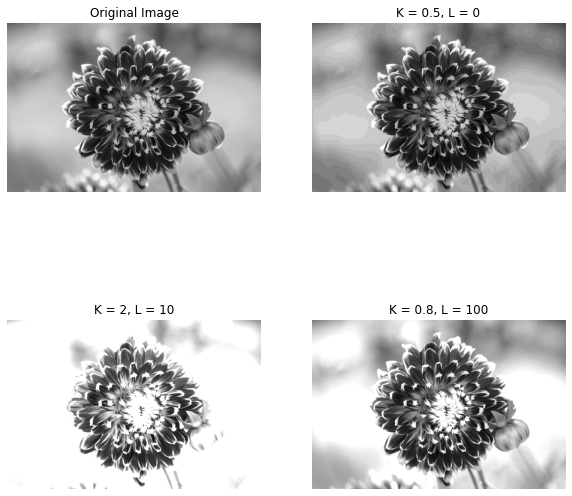

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def point_operation(img, K, L):

    img = np.asarray(img, dtype=np.float)
    img = img*K + L # K = brightness, L = contrast

    img[img > 255] = 255
    img[img < 0] = 0
    
    return np.asarray(img, dtype = np.int)

def main():
    # read an image
    img = cv2.imread(r'C:\Users\User\Desktop\flowers.jpg')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    out1 = point_operation(gray, 0.1, 0)
    out2 = point_operation(gray, 2., 0)
    out3 = point_operation(gray, 0.8, 100)
    
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
    
    ax[0,0].imshow(gray, cmap='gray')
    ax[0,0].axis('off')
    ax[0,0].set_title('Original Image')
    ax[0,1].imshow(out1, cmap='gray')
    ax[0,1].axis('off')
    ax[0,1].set_title('K = 0.5, L = 0')
    ax[1,0].imshow(out2, cmap='gray')
    ax[1,0].axis('off')
    ax[1,0].set_title('K = 2, L = 10')
    ax[1,1].imshow(out3, cmap='gray')
    ax[1,1].axis('off')
    ax[1,1].set_title('K = 0.8, L = 100')
    
if __name__ == '__main__':
    main()

Реалізація алгоритму: 

<ipython-input-97-997bae3607ba>:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  img = np.asarray(img, dtype=np.float)


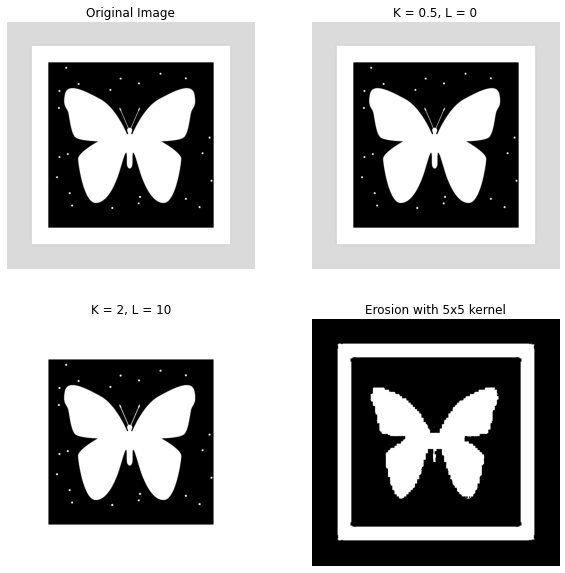

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def point_operation(img, K, L):
    img = np.asarray(img, dtype=np.float)
    img = img*K + L
    img[img > 255] = 255
    img[img < 0] = 0
    return np.asarray(img, dtype=np.uint8)

def erosion(img):

    kernel = np.ones((5, 5), dtype=np.uint8)
    out = np.zeros_like(img)
    padded_img = np.pad(img, ((2,2),(2,2)), mode='constant')

    for i in range(2, img.shape[0]+2):
        for j in range(2, img.shape[1]+2):
            if np.all(padded_img[i-2:i+3, j-2:j+3] * kernel == 255):
                out[i-2, j-2] = 255
    return out

def main():

    img = cv2.imread(r'C:\Users\User\Desktop\image.jpg')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    out1 = point_operation(gray, 0.5, 0)
    out2 = point_operation(gray, 2., 10)
    out3 = erosion(gray)

    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

    ax[0,0].imshow(gray, cmap='gray')
    ax[0,0].axis('off')
    ax[0,0].set_title('Original Image')
    ax[0,1].imshow(out1, cmap='gray')
    ax[0,1].axis('off')
    ax[0,1].set_title('K = 0.5, L = 0')
    ax[1,0].imshow(out2, cmap='gray')
    ax[1,0].axis('off')
    ax[1,0].set_title('K = 2, L = 10')

    ax[1,1].imshow(out3, cmap='gray')
    ax[1,1].axis('off')
    ax[1,1].set_title('Erosion with 5x5 kernel')
    plt.show()

if __name__ == '__main__':
    main()
